<a href="https://colab.research.google.com/github/avinashmyerolkar/Image-Classifier-CNN/blob/main/Image_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Bring kaggle dataset directly to colab notebook , to bypass local system
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
# Unzip data stored in zip file
import zipfile
zip_ref  = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
# importing imporant libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout #both these layers we will use while reducing overfitting of model

In [24]:
# as data is huge we will make Generator to give data to model in batchwise manner rather giving at a time
# we will use generator provided by keras called as "image dataset from directory"

In [25]:
#Generator for training images
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode= 'int',   #will assign 1=dog and 0=cats
    batch_size=32 ,      #will divide all images in batches "total image in train/32 = 1batch"
    image_size=(256,256)  # as all images are of diferent shapes , hence need to convert them into 256*256*3 as RGB image
)

Found 20000 files belonging to 2 classes.


In [26]:
#Generator for test images
test_ds=tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode= 'int',   #will assign 1=dog and 0=cats
    batch_size=32 ,      #will divide all images in batches "total image in train/32 = total images in 1 batch"
    image_size=(256,256)  # as all images are of diferent shapes , hence need to convert them into 256*256*3 as RGB image
)

Found 5000 files belonging to 2 classes.


In [27]:
# Normalization : As here all features of image are between 0 to 255 , so to have accurate results we will normalize features so there
# values will be between 0 to 1 #below function will normalize all features of images
def normalize(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

In [28]:
#Applying Normalizer function on train as well as test dataset
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [29]:
#Buliding a model
#first Conv2D layer has a kernel size of (3, 3), an input shape of (256, 256, 3), and 32 output channels. 
# So, the number of parameters for this layer is (3 * 3 * 3 + 1) * 32 = 896.

# MaxPooling2D layers do not have any learnable parameters. So, the number of parameters in a MaxPooling2D layer is zero.
#Flatten layers also do not have any learnable parameters.

In [38]:
model=tf.keras.Sequential()

#Convolutional layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Convolutional layer 2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Convolutional layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#flattening the layer to give to Fully connected layres
model.add(Flatten())


# Fully connected layers to have prediction on input image using sigmoid
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid')) #neuron=1 as binary class calssification problem

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [39]:
# compliling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 74s 113ms/step - loss: 1.4214 - accuracy: 0.5650 - val_loss: 0.6815 - val_accuracy: 0.5322
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6381 - accuracy: 0.6381 - val_loss: 0.6033 - val_accuracy: 0.6814
Epoch 3/10
625/625 [==============================] - 78s 124ms/step - loss: 0.6015 - accuracy: 0.6886 - val_loss: 0.6013 - val_accuracy: 0.6936
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5688 - accuracy: 0.7117 - val_loss: 2.0859 - val_accuracy: 0.6564
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5619 - accuracy: 0.7234 - val_loss: 0.5883 - val_accuracy: 0.6822
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5148 - accuracy: 0.7531 - val_loss: 0.6499 - val_accuracy: 0.6362
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5045 - accuracy: 0.7638 - val_loss: 0.5132 - val_ac

In [33]:
# During the training process, the data is usually divided into smaller batches(32 batches), and the model is trained on each batch in sequence.
# After the model has processed all the batches, one epoch is completed. 
# The number of epochs determines how many times the model will cycle through the entire dataset during training.
# Choosing the right number of epochs is important for achieving optimal model performance. 
# If the number of epochs is too low, the model may not have enough iterations to converge on an optimal solution. 
# On the other hand, if the number of epochs is too high, the model might overfit the training data and perform poorly on new, unseen data.

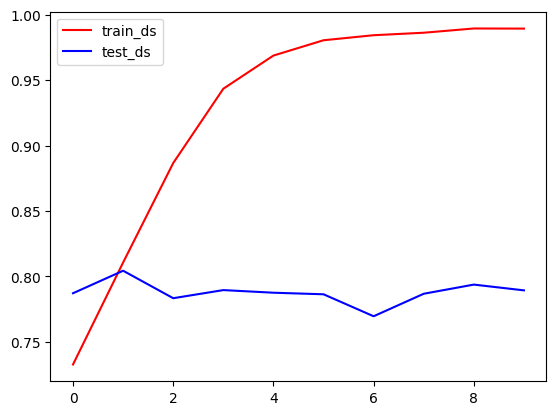

In [35]:
# By plotting graph we will check whether model overfits or underfits

#Graph will make comaparison based on training and testing accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train_ds')
plt.plot(history.history['val_accuracy'],color='blue',label='test_ds')
plt.legend()
plt.show()



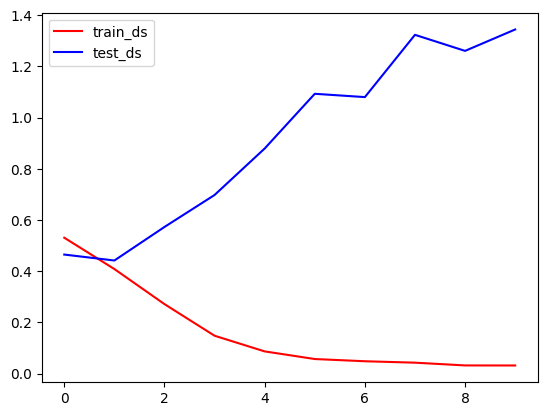

In [36]:
#Graph will make comparison based on training loss and validation / testing loss
plt.plot(history.history['loss'],color='red',label='train_ds')
plt.plot(history.history['val_loss'],color='blue',label='test_ds')
plt.legend()
plt.show()

In [ ]:
# as we can see model is overfitting as accuracy on tarining is huge comapared to testing
# we will use such as BatchNormalization and Dropout layer to reduce overfitting 

In [ ]:
#Graphs after BatchNormalization and Adding dropout layers

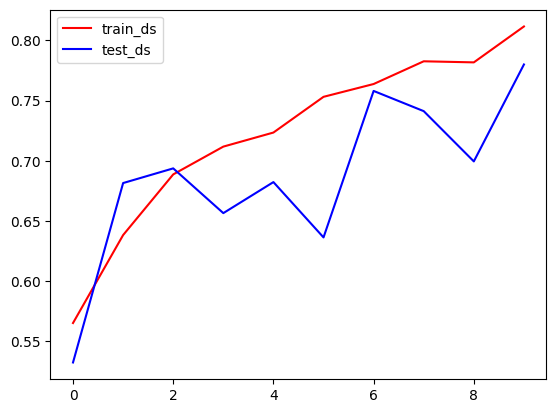

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train_ds')
plt.plot(history.history['val_accuracy'],color='blue',label='test_ds')
plt.legend()
plt.show()

In [ ]:
#here we can see overfitting reduced

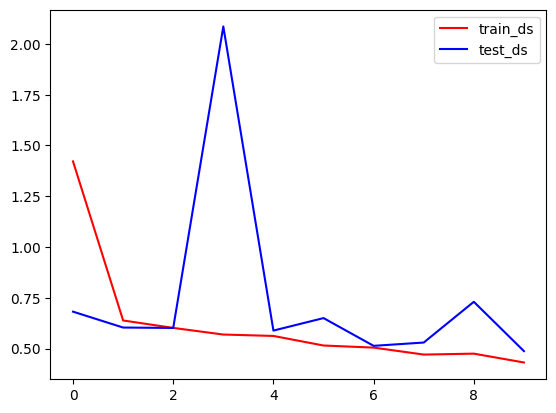

In [42]:
plt.plot(history.history['loss'],color='red',label='train_ds')
plt.plot(history.history['val_loss'],color='blue',label='test_ds')
plt.legend()
plt.show()

In [ ]:
#Prediction on random image 

In [43]:
import cv2

(825, 1100, 3)

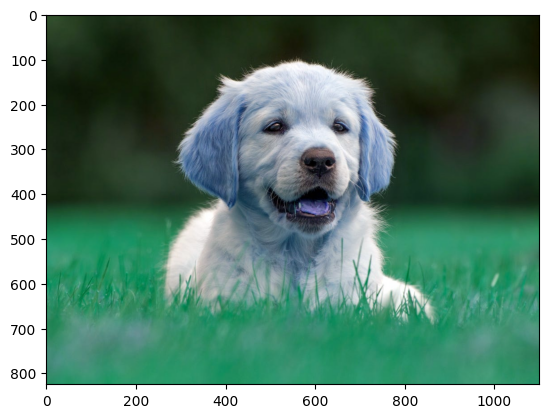

In [48]:
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
test_img.shape

In [56]:
# testing image shape is (825,1100,3) but desired shape image for our model is 
# we need to resize our test image as per our model i.e, (256,256,3)

resized_test_img=cv2.resize(test_img,(256,256))
test_input = resized_test_img.reshape((1,256,256,3)) # 1 as only 1 image in batch , 3 as rgb image
model.predict(test_input)

1/1 [==============================] - 0s 276ms/step


array([[1.]], dtype=float32)

In [57]:
# as class =1 hence its a dog , which is accurate result

In [ ]:
#testing for cat image

(2304, 3456, 3)

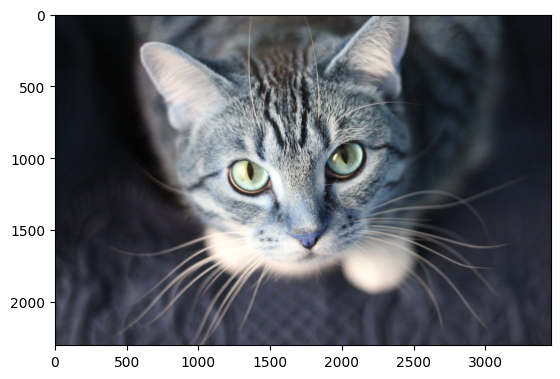

In [58]:
test_img=cv2.imread('/content/cat.jpg')
plt.imshow(test_img)
test_img.shape

In [59]:

resized_test_img=cv2.resize(test_img,(256,256))
test_input = resized_test_img.reshape((1,256,256,3)) # 1 as only 1 image in batch , 3 as rgb image
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.1591186]], dtype=float32)